In [2]:
from IPython.core.display_functions import display
import matplotlib.pyplot as plt
import matplotlib as mpl
# Use the pgf backend (must be set before pyplot imported)
# mpl.use('pgf')

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

random_seed = 1
np.random.seed(random_seed)

In [3]:
# from https://jwalton.info/Matplotlib-latex-PGF/
def set_size(width, fraction=1, subplots=(1, 1)):
    """Set figure dimensions to avoid scaling in LaTeX.

    Parameters
    ----------
    width: float or string
            Document width in points, or string of predined document type
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy
    subplots: array-like, optional
            The number of rows and columns of subplots.
    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    if width == 'thesis':
        width_pt = 426.79135
    elif width == 'beamer':
        width_pt = 307.28987
    else:
        width_pt = width

    # Width of figure (in pts)
    fig_width_pt = width_pt * fraction
    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    # https://disq.us/p/2940ij3
    golden_ratio = (5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio * (subplots[0] / subplots[1])

    return (fig_width_in, fig_height_in)

In [4]:
# Width of the LaTeX document
width = 364

plt.style.use('seaborn-colorblind')

tex_fonts = {
    # Use LaTeX to write all text
    "text.usetex": True,
    "font.family": "serif",
    # Use 11pt font in plots, to match 11pt font in document
    "axes.labelsize": 11,
    "font.size": 11
}
plt.rcParams.update(tex_fonts)


In [16]:
stations_df = pd.read_csv('./data/stations.csv')
stations_dict = stations_df.groupby(['common_id']).first().to_dict('index')

FileNotFoundError: [Errno 2] No such file or directory: './data/raw/stations.csv'

In [17]:
common_id = '36022-ie'
df = pd.read_parquet(f'data/raw/parquet/{common_id}.parquet')
df['water_level'] = df['value']
del df['value']
df['timestamp'] = df['sourceDate']
del df['sourceDate']
df.sort_values(by='timestamp', inplace=True)
df.reset_index(drop=True, inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27189 entries, 0 to 27188
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   water_level  27189 non-null  float64            
 1   timestamp    27189 non-null  datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), float64(1)
memory usage: 425.0 KB


In [8]:
# display(df.head())
display(df.describe())

,water_level
count,27175.000000
mean,36.213362
std,14.756872
min,0.000000
25%,26.600000
50%,31.900000
75%,40.500000
max,190.000000


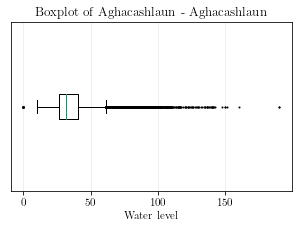

In [9]:
fig, ax = plt.subplots(1, 1, figsize=set_size(width))
plt.boxplot(df['water_level'].to_numpy(), vert=False, flierprops={'marker': '.', 'markersize': 2})
plt.xlabel('Water level')
# Hide y axis
ax.get_yaxis().set_visible(False)
plt.title(f'Boxplot of {stations_dict[common_id]["water_name"]} - {stations_dict[common_id]["station_name"]}')
plt.grid(alpha=0.25)


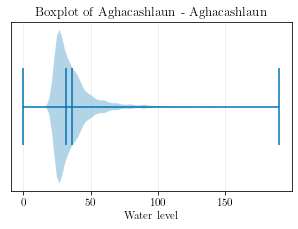

In [10]:
fig, ax = plt.subplots(1, 1, figsize=set_size(width))
plt.violinplot(df['water_level'].to_numpy(), vert=False,showmeans=True, showmedians=True, showextrema=True)
plt.xlabel('Water level')
# Hide y axis
ax.get_yaxis().set_visible(False)
plt.title(f'Boxplot of {stations_dict[common_id]["water_name"]} - {stations_dict[common_id]["station_name"]}')
plt.grid(alpha=0.25)


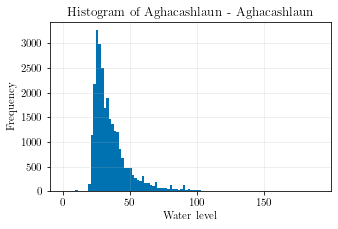

In [11]:
fig, ax = plt.subplots(1, 1, figsize=set_size(width))
plt.hist(df['water_level'].to_numpy(), bins=100)
plt.xlabel('Water level')
plt.ylabel('Frequency')
plt.title(f'Histogram of {stations_dict[common_id]["water_name"]} - {stations_dict[common_id]["station_name"]}')
plt.grid(alpha=0.25)
plt.show()


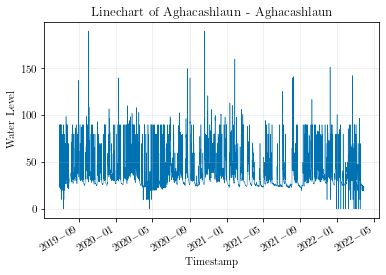

In [12]:
fig, ax = plt.subplots(1, 1)#, figsize=set_size(width)
plt.plot(df['timestamp'], df['water_level'], linewidth=0.5, zorder=-1)
# plt.scatter(df['timestamp'], df['water_level'], s=0.5)
plt.gcf().autofmt_xdate()
plt.xlabel('Timestamp')
plt.ylabel('Water Level')
plt.title(f'Linechart of {stations_dict[common_id]["water_name"]} - {stations_dict[common_id]["station_name"]}')
plt.grid(alpha=0.25)
# plt.show()
fig.savefig(f'./pdfs/line_chart.pdf', format='pdf', bbox_inches='tight')


In [13]:
n_line_plots = 5
min_date = df['timestamp'].min()
max_date = df['timestamp'].max()
date_range = pd.date_range(min_date, max_date, periods=n_line_plots+1).to_list()


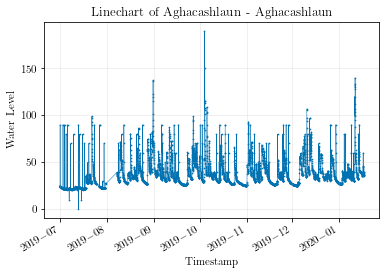

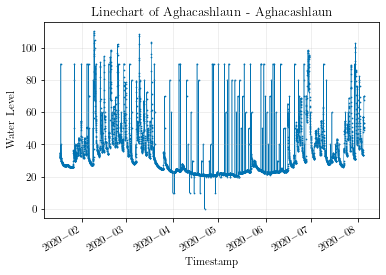

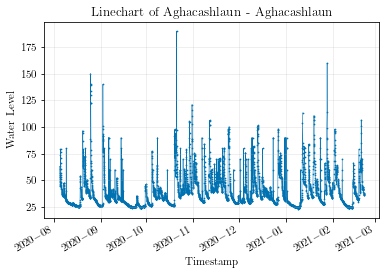

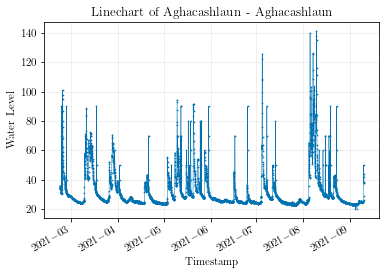

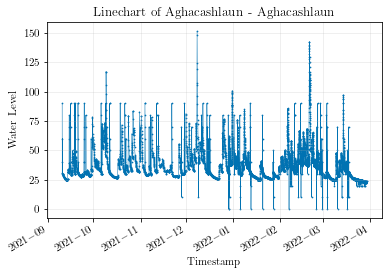

In [14]:
for i in range(n_line_plots):
    fig, ax = plt.subplots(1, 1)#, figsize=set_size(width))
    df_slice = df[(df['timestamp'] >= date_range[i]) & (df['timestamp'] < date_range[i + 1])]
    plt.plot(df_slice['timestamp'], df_slice['water_level'], linewidth=0.5, zorder=-1)
    plt.scatter(df_slice['timestamp'], df_slice['water_level'], s=0.5)
    plt.gcf().autofmt_xdate()
    plt.xlabel('Timestamp')
    plt.ylabel('Water Level')
    plt.title(f'Linechart of {stations_dict[common_id]["water_name"]} - {stations_dict[common_id]["station_name"]}')
    plt.grid(alpha=0.25)
    # plt.show()
    fig.savefig(f'./pdfs/line_chart{i}.pdf', format='pdf', bbox_inches='tight')
    # break

In [15]:
df_slice =df[(df['timestamp'] >= (df['timestamp'].max() - np.timedelta64(0.5, 'M'))) & (df['timestamp'] <= (df['timestamp'].max() + np.timedelta64(0.5, 'M')))]
fig, ax = plt.subplots(1, 1)#, figsize=set_size(width))
plt.plot(df_slice['timestamp'], df_slice['water_level'], linewidth=0.5, zorder=-1)
plt.scatter(df_slice['timestamp'], df_slice['water_level'], s=0.5)
plt.gcf().autofmt_xdate()
plt.xlabel('Timestamp')
plt.ylabel('Water Level')
plt.title(f'Linechart of {stations_dict[common_id]["water_name"]} - {stations_dict[common_id]["station_name"]}')
plt.grid(alpha=0.25)

ValueError: Could not convert object to NumPy timedelta